In [91]:
import tensorflow as tf
from tensorflow.keras import models,layers 
import matplotlib.pyplot as plt 
import albumentations as A  
import cv2
from PIL import Image

In [106]:
BATCH_SIZE = 30
IMAGE_SIZE = 512
CHANNELS=3
EPOCHS=50

In [48]:
test_directory = "C:/Users/siddh/Desktop/kindey_dataset/dump-20240806T175515Z-001/dump/test"
train_directory = "C:/Users/siddh/Desktop/kindey_dataset/dump-20240806T175515Z-001/dump/train"
val_directory = "C:/Users/siddh/Desktop/kindey_dataset/dump-20240806T175515Z-001/dump/val"

In [73]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory, 
    shuffle = True,
    image_size = (512,512),
    batch_size = 30  
)

Found 272 files belonging to 3 classes.


In [74]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, 
    shuffle = True,
    image_size = (512,512),
    batch_size = 30  
)

Found 74 files belonging to 3 classes.


In [75]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory, 
    shuffle = True,
    image_size = (512,512),
    batch_size = 30  
)

Found 43 files belonging to 3 classes.


In [76]:
class_name = train_data.class_names
class_name

['Background', 'Kidney', 'Tumour']

In [77]:
for image_batch, labels_batch in train_data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(30, 512, 512, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


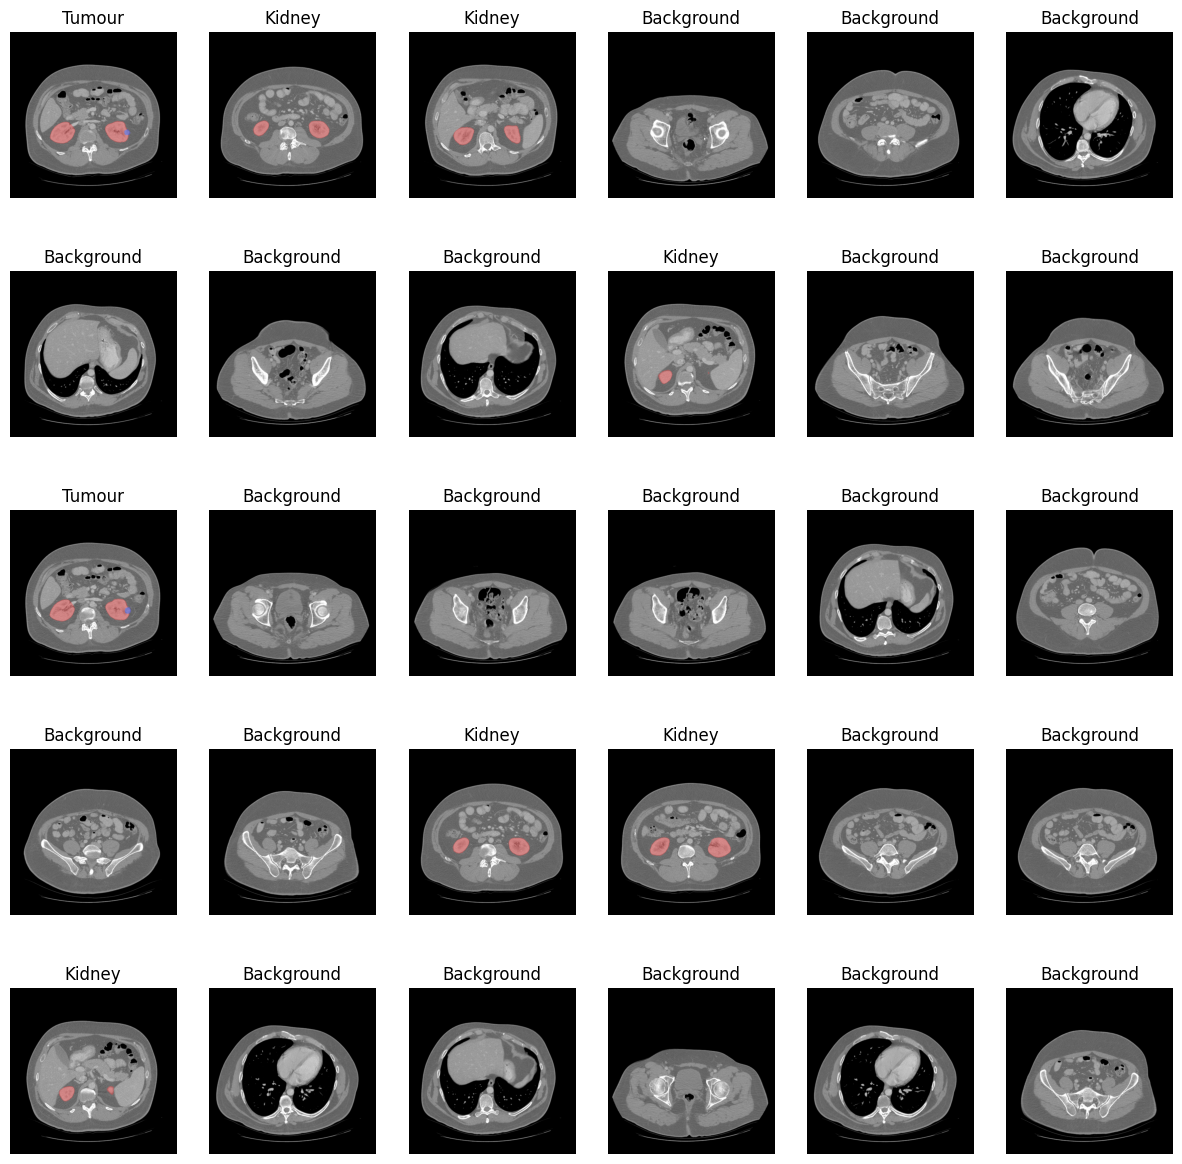

In [78]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in train_data.take(1):
    for i in range(30):
        ax = plt.subplot(5, 6, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [99]:
"""transform = A.Compose([
    A.Blur(blur_limit=(71), p=1),
    A.Resize(512, 512),
    A.RandomBrightnessContrast(p=1.),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5)
])"""

'transform = A.Compose([\n    A.Blur(blur_limit=(71), p=1),\n    A.Resize(512, 512),\n    A.RandomBrightnessContrast(p=1.),\n    A.HorizontalFlip(p=0.5),\n    A.VerticalFlip(p=0.5)\n])'

In [107]:
train_ds = train_data.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_data.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_data.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [116]:
from tensorflow.keras import layers, models

# Correct input shape without batch size
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Optional: Summary to check the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                 │ (None, 510, 510, 32)          │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_12 (MaxPooling2D)    │ (None, 255, 255, 32)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_13 (Conv2D)                 │ (None, 253, 253, 64)          │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_13 (MaxPooling2D)    │ (None, 126, 126, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_14 (Conv2D)                 │ (None, 124, 124, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_14 (MaxPooling2D)    │ (None, 62, 62, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_15 (Conv2D)                 │ (None, 60, 60, 64)            │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_15 (MaxPooling2D)    │ (None, 30, 30, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_16 (Conv2D)                 │ (None, 28, 28, 64)            │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_16 (MaxPooling2D)    │ (None, 14, 14, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_17 (Conv2D)                 │ (None, 12, 12, 64)            │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_17 (MaxPooling2D)    │ (None, 6, 6, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_2 (Flatten)                │ (None, 2304)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 64)                    │     147,520 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_5 (Dense)                    │ (None, 3)                     │         195 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 314,819 (1.20 MB)

 Trainable params: 314,819 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [119]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.4134 - loss: 12.1669 - val_accuracy: 0.7674 - val_loss: 0.6736
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.8157 - loss: 0.7968 - val_accuracy: 0.8605 - val_loss: 0.4683
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.8334 - loss: 0.5183 - val_accuracy: 0.8140 - val_loss: 0.3706
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.9530 - loss: 0.2123 - val_accuracy: 0.7674 - val_loss: 0.4844
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - accuracy: 0.8799 - loss: 0.2797 - val_accuracy: 0.8605 - val_loss: 0.4193
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.9844 - loss: 0.0926 - val_accuracy: 0.8605 - val_loss: 0.4794
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9676 - loss: 0.0856 - val_accuracy: 0.9767 - val_loss: 0.1870
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.9750 - loss: 0.1056 - val_accuracy: 0.6977 - val_loss

In [126]:
scores = model.evaluate(test_ds)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7913 - loss: 1.0502 


In [127]:
scores

[1.5534452199935913, 0.7432432174682617]

In [128]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

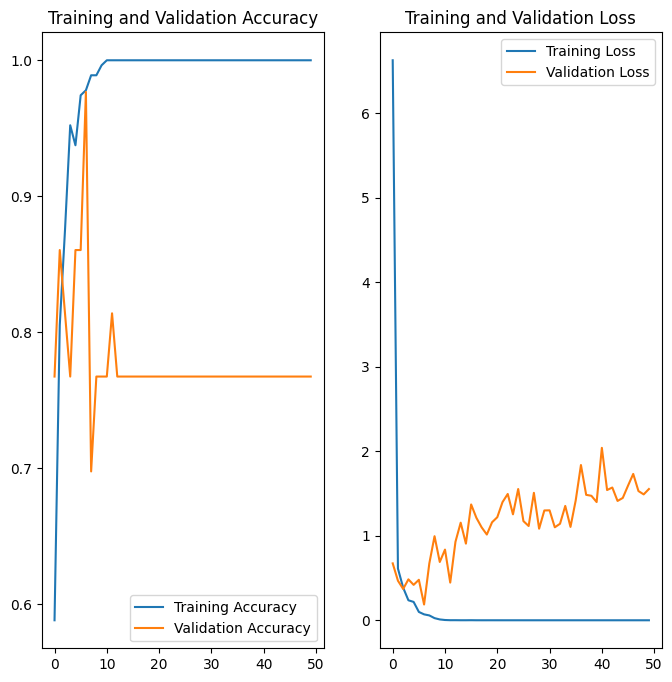

In [129]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()